In [3]:
import os.path as op
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.2)

from pyplr import graphing, utils, preproc
from pyplr.plr import PLR
import numpy as np
import numpy as np
from scipy.signal import butter,filtfilt

In [4]:
def butter_lowpass_filter(data, cutoff, fs, order,filtype):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype=filtype, analog=False)
    y = filtfilt(b, a, data)
    return y
def json_reader(path_to_file):
    with open(path_to_file) as f:
        data = f.read()
  
    #print("Data type before reconstruction : ", type(data))
      
    # reconstructing the data as a dictionary
    js = json.loads(data)
  
    #print("Data type after reconstruction : ", type(js))
    #print(js)
    return js
def json_writer(DATA,participant_no):
# create json object from dictionary
    jsonobj = json.dumps(DATA)

# open file for writing, "w" 
    save_file = 'replicationjsons/'+str(participant_no)+".json"
    f = open(save_file,"w")

# write json object to file
    f.write(jsonobj)
    f.close()
    return 

In [59]:
def butter_lowpass_filter(data, cutoff, fs, order,filtype):
    nyq = fs/2;
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype=filtype, analog=False)
    y = filtfilt(b, a, data)

In [60]:
user_dictionary['850']['block_1']['second_set']

[3.093132662540821,
 3.06665576595262,
 3.0615064155280343,
 3.066015511342284,
 2.982432206386921,
 2.9588891243155606,
 2.970276145467902,
 2.972107992799234,
 2.8382491326451875,
 2.884728557601023,
 2.894316135061844,
 2.922854710364516,
 2.9229659587475445,
 2.931496418748174,
 2.93545952554204,
 2.929194859340924,
 2.917321774867319,
 2.90730949961836,
 2.9223943033850213,
 2.908871291288868,
 2.922884383734164,
 2.956360734468087,
 2.9873665800686937,
 2.9644973875389065,
 2.959375161120012,
 3.043760745977694,
 3.042596377716442,
 3.01691462792834,
 3.020831785672639,
 3.019897294691728,
 3.0119338555638797,
 3.0211286766456342,
 3.0383243413276237,
 3.0545737664683457,
 3.060835528441065,
 3.0698724347280653,
 3.08115797589912,
 3.0878209420932503,
 3.0903303070233274,
 3.0936771158206744,
 3.1214251768374366,
 3.152801683944686,
 3.100938647736905,
 3.0743499414634474,
 3.073820267477965,
 3.068360844157156,
 2.895643758306629,
 2.932592234708399]

In [61]:
y = (user_dictionary['850']['block_1']['second_set'])

In [62]:
y

[3.093132662540821,
 3.06665576595262,
 3.0615064155280343,
 3.066015511342284,
 2.982432206386921,
 2.9588891243155606,
 2.970276145467902,
 2.972107992799234,
 2.8382491326451875,
 2.884728557601023,
 2.894316135061844,
 2.922854710364516,
 2.9229659587475445,
 2.931496418748174,
 2.93545952554204,
 2.929194859340924,
 2.917321774867319,
 2.90730949961836,
 2.9223943033850213,
 2.908871291288868,
 2.922884383734164,
 2.956360734468087,
 2.9873665800686937,
 2.9644973875389065,
 2.959375161120012,
 3.043760745977694,
 3.042596377716442,
 3.01691462792834,
 3.020831785672639,
 3.019897294691728,
 3.0119338555638797,
 3.0211286766456342,
 3.0383243413276237,
 3.0545737664683457,
 3.060835528441065,
 3.0698724347280653,
 3.08115797589912,
 3.0878209420932503,
 3.0903303070233274,
 3.0936771158206744,
 3.1214251768374366,
 3.152801683944686,
 3.100938647736905,
 3.0743499414634474,
 3.073820267477965,
 3.068360844157156,
 2.895643758306629,
 2.932592234708399]

In [6]:
trial_keys = ['trial_1', 'trial_2', 'trial_3']

In [28]:
def pupil_extract(path,participant_no,trial_keys):
    count = 0
    experimentsrc_data =  json_reader('/Users/noelalben/github/pupil-pitch/DATA_replication_compare.txt')
    participant_data= json_reader('/Users/noelalben/github/pupil-pitch/DATA_replication.txt')
    frequencies = ['820','826','832','838','844','850','856','862','868','874','880']
    block_keys = ['block_1', 'block_2', 'block_3']
    user_dictionary = {}
    for i in frequencies:
        user_dictionary[i] = {}
        for j in block_keys:
            user_dictionary[i][j] = {}
            user_dictionary[i][j]['untilevent0'] =[]
            user_dictionary[i][j]['time_stamps']=[]
            user_dictionary[i][j]['event_stamps']=[]
            user_dictionary[i][j]['first_set']=[]
            user_dictionary[i][j]['second_set']=[]
            user_dictionary[i][j]['first_set_timestamps']=[]
            user_dictionary[i][j]['second_set_timestamps']=[]
            user_dictionary[i][j]['setup_to_next_trial'] = []
    #trial_keys = ['trial_1', 'trial_2', 'trial_3', 'trial_4', 'trial_5']
    # Some useful constants
    SAMPLE_RATE = 200
    #DURATION = 1500
    #ONSET_IDX = 1
    # Columns to load
    use_cols = ['confidence',
            'method',
            'pupil_timestamp',
            'eye_id',
            'diameter_3d',
            'diameter']
    participant_info = experimentsrc_data[str(200)+str(participant_no)]
    for block in range(1,len(trial_keys)+1):
        block_folder = '200'+str(participant_no)+str(block)
        if(participant_no >= 10):
                block_folder = '200'+str(participant_no)+str(block)
                print(block_folder)
                flag = True
        else:
            flag = False
        freqs = []
        for trial_number in range(0,11):
            freq = participant_info[trial_keys[block-1]]['Stimuli'][trial_number][6:9]
            freqs.append(freq)
            print(freqs)
            user_block = user_dictionary[freq][block_keys[block-1]]
            
            #print(user_block)
            trial_folder = '00'+str(trial_number)
            if(trial_number == 10):
                trial_folder = '010'
            directory = path+'/'+block_folder+'/'+trial_folder
            if(flag==True):
                directory = path+'/'+block_folder+'/'+trial_folder
            print(directory)
            # Pupil Labs recording directories / exports
            subjects = {
            '001': [directory, '000']
            }
            df = pd.DataFrame()

            # Loop over subjects
            for k in subjects.keys():
                # Get a handle on a subject
                rec = subjects[k][0]
                export = subjects[k][1]
                s = utils.new_subject(
                    rec, export=export, out_dir_nm='pyplr_analysis')

                # Load pupil data
                samples = utils.load_pupil(
                    s['data_dir'], eye_id='best', method='3d', cols=use_cols)
                blinks  = utils.load_blinks(s['data_dir'])

                # Pupil columns to analyse
                pupil_cols = ['diameter_3d', 'diameter']

                #First Derivative on the confidence values to mask sudden changes
                samples = preproc.mask_pupil_first_derivative(samples, threshold=3.0, mask_cols=pupil_cols)
                
                try:
                    #Mask Blinks (inbuilt function not best performance)
                    samples = preproc.mask_blinks(samples, blinks, mask_cols=['diameter_3d'])

                    #Mask Pupil Confidence (Removing blinks based on sudden changes in pupil confidence scores)
                    samples = preproc.mask_pupil_confidence(samples, threshold=0.75, mask_cols=pupil_cols)


                    #Low Pass Filter the Samples at a 1 Hz Cut off
                    #try:
                        #Interpolate Samples 

                    samples = preproc.interpolate_pupil(samples, method='nearest', order=2,interp_cols=pupil_cols)
                    samplestmp = samples
                    samples1 = preproc.butterworth_series(samplestmp, fields=pupil_cols, filt_order=3,cutoff_freq=1/(200/2))
                    if (samples1['diameter_3d'].isnull().all() == True):
                        samples = samples
                    else:
                        samples = samples1
                   # except samples['diameter_3d'].isnull().all() == True:
                except Exception:
                                        #Mask Pupil Confidence
                    samples = preproc.mask_pupil_confidence(samples, threshold=0.75, mask_cols=pupil_cols)


                    #Low Pass Filter the Samples at a 1 Hz Cut off
                    #try:
                        #Interpolate Samples 

                    samples = preproc.interpolate_pupil(samples, method='nearest', order=2,interp_cols=pupil_cols)
                    samplestmp = samples
                    samples1 = preproc.butterworth_series(samplestmp, fields=pupil_cols, filt_order=3,cutoff_freq=1/(200/2))
                    if (samples1['diameter_3d'].isnull().all() == True):
                        samples = samples
                    else:
                        samples = samples1
                   # except samples['diameter_3d'].isnull().all() == True:
                    
                    
                    
 # Mapping all the events to time stamps from the recorded data
                events = utils.load_annotations(s['data_dir'])
                event_qeury = events.axes[0].tolist()
                event_qeury = [round(float(i), 2) for i in event_qeury]
                qeury = samples.axes[0].tolist()
                query = [round(float(i), 2) for i in qeury ]
                user_block['time_stamps'] = query
                user_block['event_stamps'] = event_qeury
                
                interpolation = np.size(np.where(samples['interpolated']==1)[0])
                all_values =  np.size(samples['interpolated'])
                percs = interpolation/all_values
                if(percs>0.8):
                    user_block['first_set'] = 'Reject'
                    user_block['second_set'] = 'Reject'
                    count = count+1
                    print('------here--------')
                    continue

                #Plotting the samples for participant
                #First two Events 
                try:
                    samples_extract = samples.iloc[query.index(event_qeury[0]):query.index(event_qeury[1])+600,:].iloc[::50,:].axes[0].tolist()
                    user_block['first_set_timestamps'] = samples_extract
                    user_block['untilevent0'] =samples.iloc[0:query.index(event_qeury[0]),:]['diameter_3d'].tolist()
                    user_block['first_set'] = samples.iloc[query.index(event_qeury[0]):query.index(event_qeury[1])+600,:].iloc[::50,:]['diameter_3d'].tolist()
                    # Loading waiting for ready signal from previous block 
                    if trial_number == 0:
                        if (block > 1):
                            freqCheck = participant_info[trial_keys[block-2]]['Stimuli'][10][6:9]
                            user_block_prev = user_dictionary[freqCheck][block_keys[block-2]]
                    if trial_number>0:
                        print(trial_number)
                        user_block_prev = user_dictionary[freqs[trial_number-1]][block_keys[block-1]]
                        setup = user_block_prev['setup_to_next_trial']
                        if(user_block_prev['first_set'] != 'Reject'):
                            setup = setup[len(setup) - 1::-1][0:12]
                            setup = setup[len(setup) - 1::-1]
                            user_block['first_set'][:0] = setup[0:12]

               # Second set of Events
                    samples_extract2 = samples.iloc[query.index(event_qeury[2]):query.index(event_qeury[4])+800,:].iloc[::50,:].axes[0].tolist()
                    user_block['second_set_timestamps']=samples_extract2
                    
                    user_block['second_set'] = samples.iloc[query.index(event_qeury[2]):query.index(event_qeury[4])+800,:].iloc[::50,:]['diameter_3d'].tolist()
             # Anticipation of new block
                    samples_extract3 = samples.iloc[query.index(event_qeury[4])+200:,:].iloc[::50,:]['diameter_3d'].tolist()
                    user_block['setup_to_next_trial'] = samples_extract3
                    
                except Exception:
                    continue
                
    json_writer(user_dictionary,participant_no)
    
    return user_dictionary

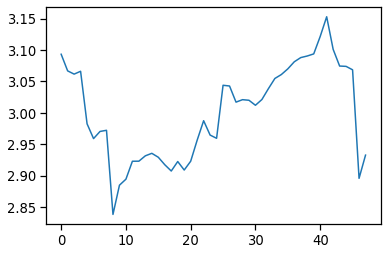

In [113]:
plt.plot((user_dictionary['850']['block_1']['second_set']))
#derivative

In [23]:

user_dictionary = pupil_extract(path,participant_no,trial_keys)

NameError: name 'participant_no' is not defined

In [74]:
path = '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings'
#dic_5 = pupil_extract(path,5,trial_keys)

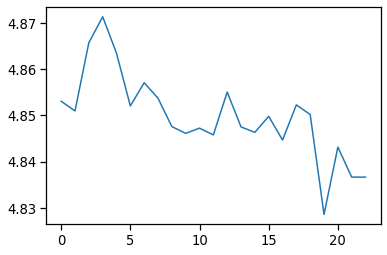

In [27]:
plt.plot(dic_5['850']['block_1']['untilevent0'][0:-10])

In [36]:
block_keys = ['block_1', 'block_2', 'block_3']
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']
for i in block_keys:
    for j in frequencies:
            print(len(dic_5[j][i]['first_set']))

25
26
13
25
25
24
25
26
26
25
25
25
25
25
25
25
26
25
25
25
25
13
25
25
25
25
25
25
26
13
25
25
25


In [126]:
dic_5

{'820': {'block_1': {'time_stamps': [338.2,
    338.2,
    338.21,
    338.21,
    338.22,
    338.22,
    338.23,
    338.23,
    338.24,
    338.24,
    338.25,
    338.25,
    338.26,
    338.26,
    338.27,
    338.27,
    338.28,
    338.28,
    338.29,
    338.29,
    338.3,
    338.3,
    338.31,
    338.31,
    338.32,
    338.32,
    338.33,
    338.33,
    338.34,
    338.34,
    338.35,
    338.35,
    338.36,
    338.36,
    338.37,
    338.37,
    338.38,
    338.38,
    338.39,
    338.39,
    338.4,
    338.4,
    338.41,
    338.41,
    338.42,
    338.42,
    338.43,
    338.43,
    338.44,
    338.44,
    338.45,
    338.45,
    338.46,
    338.46,
    338.47,
    338.47,
    338.48,
    338.48,
    338.49,
    338.49,
    338.5,
    338.5,
    338.51,
    338.51,
    338.52,
    338.52,
    338.53,
    338.53,
    338.54,
    338.54,
    338.55,
    338.55,
    338.56,
    338.56,
    338.57,
    338.57,
    338.58,
    338.58,
    338.59,
    338.59,
    338.6,
    

In [63]:
experimentsrc_data =  json_reader('/Users/noelalben/github/pupil-pitch/DATA_replication_compare.txt')

In [64]:
experimentsrc_data


{'2003': {'trial_1': {'Stimuli': ['Audio/820.0.wav',
    'Audio/850.0.wav',
    'Audio/844.0.wav',
    'Audio/880.0.wav',
    'Audio/856.0.wav',
    'Audio/868.0.wav',
    'Audio/862.0.wav',
    'Audio/874.0.wav',
    'Audio/838.0.wav',
    'Audio/826.0.wav',
    'Audio/832.0.wav'],
   'Answers': ['lshift',
    'equal',
    'lshift',
    'rshift',
    'rshift',
    'rshift',
    'rshift',
    'rshift',
    'lshift',
    'lshift',
    'lshift']},
  'trial_2': {'Stimuli': ['Audio/844.0.wav',
    'Audio/838.0.wav',
    'Audio/880.0.wav',
    'Audio/832.0.wav',
    'Audio/826.0.wav',
    'Audio/856.0.wav',
    'Audio/862.0.wav',
    'Audio/874.0.wav',
    'Audio/850.0.wav',
    'Audio/820.0.wav',
    'Audio/868.0.wav'],
   'Answers': ['lshift',
    'lshift',
    'rshift',
    'lshift',
    'lshift',
    'rshift',
    'rshift',
    'rshift',
    'equal',
    'lshift',
    'rshift']},
  'trial_3': {'Stimuli': ['Audio/838.0.wav',
    'Audio/862.0.wav',
    'Audio/844.0.wav',
    'Audio/850.0.

In [12]:
experimentsrc_data['5']

{'5': {'Sound_times': {'start_sound': [[256.7992649664018,
     280.04031862240186,
     303.4472199828019,
     322.101968788802,
     339.6073286838018,
     356.3120233848017,
     372.9007384378019,
     392.0227317494016,
     410.0610396868019,
     428.59989812440176,
     446.2391088078016],
    [482.9324261894019,
     502.289284278402,
     523.8109468728017,
     546.1167137484019,
     570.6239180208017,
     593.2473547892016,
     614.6051275994016,
     631.8245441658019,
     649.9301384938017,
     671.3388862698016,
     691.0750623744018],
    [723.3014560094018,
     740.6392758748016,
     759.1782673094019,
     778.817331255802,
     795.0892608412016,
     815.3775630448017,
     830.8653330108018,
     852.1385002044019,
     871.6103303278019,
     889.0990570928016,
     905.4559873244018]],
   'reference_sound': [[263.8046925444012,
     287.0467507744013,
     307.44911822140125,
     325.0900090384014,
     342.61062436240104,
     359.3136086484012,
     

In [75]:
dics = []
for i in range(4,10):
    dics.append(pupil_extract(path,i,trial_keys))

['856']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20041/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4012 samples
1 blinks detected by Pupil Labs (mean dur = 4.033 s)
Loaded 6 events
['856', '844']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20041/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3381 samples
1 blinks detected by Pupil Labs (mean dur = 0.280 s)
Loaded 6 events
1
['856', '844', '832']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20041/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4270 samples
[Errno 2

Loaded 4129 samples
2 blinks detected by Pupil Labs (mean dur = 0.164 s)
Loaded 6 events
10
['820']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20043/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4157 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20043/000/exports/000/blinks.csv'
Loaded 6 events
['820', '826']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20043/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3963 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20043/001/exports/000/blinks.csv'
Loaded 6 events
1
['820', '826', '850']
/Volumes/NoelHDD/Pupil-PitchData/Re

Loaded 3599 samples
8 blinks detected by Pupil Labs (mean dur = 0.255 s)
Loaded 6 events
10
['880']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20052/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3836 samples
10 blinks detected by Pupil Labs (mean dur = 0.278 s)
Loaded 6 events
['880', '820']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20052/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4262 samples
11 blinks detected by Pupil Labs (mean dur = 0.363 s)
Loaded 6 events
1
['880', '820', '874']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20052/002
************************************************************
*************************** 002 ************************

Loaded 3454 samples
5 blinks detected by Pupil Labs (mean dur = 0.855 s)
Loaded 6 events
10
['856']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20061/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3687 samples
7 blinks detected by Pupil Labs (mean dur = 0.180 s)
Loaded 6 events
['856', '832']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20061/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3439 samples
8 blinks detected by Pupil Labs (mean dur = 0.165 s)
Loaded 6 events
1
['856', '832', '880']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20061/002
************************************************************
*************************** 002 **************************

Loaded 4328 samples
12 blinks detected by Pupil Labs (mean dur = 0.347 s)
Loaded 6 events
10
['832']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20063/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3801 samples
16 blinks detected by Pupil Labs (mean dur = 0.166 s)
Loaded 6 events
['832', '838']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20063/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3964 samples
12 blinks detected by Pupil Labs (mean dur = 0.174 s)
Loaded 6 events
1
['832', '838', '856']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20063/002
************************************************************
*************************** 002 ***********************

Loaded 3801 samples
2 blinks detected by Pupil Labs (mean dur = 1.329 s)
Loaded 6 events
8
['856', '850', '868', '844', '820', '874', '862', '826', '880', '838']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20071/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 4110 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20071/009/exports/000/blinks.csv'
Loaded 6 events
9
['856', '850', '868', '844', '820', '874', '862', '826', '880', '838', '832']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20071/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 3902 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Repli

Loaded 3808 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20073/007/exports/000/blinks.csv'
Loaded 6 events
7
['868', '874', '826', '862', '832', '850', '820', '880', '844']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20073/008
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 4419 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20073/008/exports/000/blinks.csv'
Loaded 6 events
8
['868', '874', '826', '862', '832', '850', '820', '880', '844', '838']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20073/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 4083 samples
1 blinks detect

Loaded 3581 samples
4 blinks detected by Pupil Labs (mean dur = 0.303 s)
Loaded 6 events
8
['832', '874', '820', '826', '844', '868', '862', '880', '838', '856']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20082/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 3627 samples
6 blinks detected by Pupil Labs (mean dur = 0.342 s)
Loaded 6 events
9
['832', '874', '820', '826', '844', '868', '862', '880', '838', '856', '850']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20082/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 3588 samples
5 blinks detected by Pupil Labs (mean dur = 0.348 s)
Loaded 6 events
10
['844']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20083/000
*****

Loaded 3601 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20091/009/exports/000/blinks.csv'
Loaded 6 events
9
['826', '832', '862', '880', '820', '850', '856', '868', '844', '874', '838']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20091/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 3454 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20091/010/exports/000/blinks.csv'
Loaded 6 events
10
['832']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20092/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3521 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-Pi

Loaded 4251 samples
7 blinks detected by Pupil Labs (mean dur = 0.172 s)
Loaded 6 events
8
['820', '880', '832', '856', '874', '844', '868', '838', '850', '826']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20093/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 4371 samples
5 blinks detected by Pupil Labs (mean dur = 0.141 s)
Loaded 6 events
9
['820', '880', '832', '856', '874', '844', '868', '838', '850', '826', '862']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20093/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4150 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/20093/010/exports/000/blinks.csv'
Loaded 6 events
10


In [76]:
for i in range(11,18):
    dics.append(pupil_extract(path,i,trial_keys))

200111
['850']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200111/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4316 samples
4 blinks detected by Pupil Labs (mean dur = 1.228 s)
Loaded 6 events
['850', '820']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200111/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3091 samples
2 blinks detected by Pupil Labs (mean dur = 5.324 s)
Loaded 6 events
1
['850', '820', '838']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200111/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3513 sample

Loaded 3403 samples
1 blinks detected by Pupil Labs (mean dur = 2.469 s)
Loaded 6 events
10
200113
['832']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200113/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3921 samples
4 blinks detected by Pupil Labs (mean dur = 1.330 s)
Loaded 6 events
['832', '820']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200113/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4136 samples
3 blinks detected by Pupil Labs (mean dur = 3.244 s)
Loaded 6 events
1
['832', '820', '868']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200113/002
************************************************************
*************************** 002 ****************

Loaded 3575 samples
6 blinks detected by Pupil Labs (mean dur = 0.150 s)
Loaded 6 events
['832', '826']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200122/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4162 samples
6 blinks detected by Pupil Labs (mean dur = 0.136 s)
Loaded 6 events
1
['832', '826', '880']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200122/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4002 samples
14 blinks detected by Pupil Labs (mean dur = 0.152 s)
Loaded 6 events
2
['832', '826', '880', '868']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200122/003
************************************************************
*************************** 003 **

Loaded 3317 samples
3 blinks detected by Pupil Labs (mean dur = 0.157 s)
Loaded 6 events
10
200131
['844']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200131/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4089 samples
6 blinks detected by Pupil Labs (mean dur = 0.372 s)
Loaded 6 events
['844', '874']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200131/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4403 samples
2 blinks detected by Pupil Labs (mean dur = 0.388 s)
Loaded 6 events
1
['844', '874', '880']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200131/002
************************************************************
*************************** 002 ****************

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3889 samples
4 blinks detected by Pupil Labs (mean dur = 0.736 s)
Loaded 6 events
['880', '826']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200133/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3873 samples
6 blinks detected by Pupil Labs (mean dur = 0.344 s)
Loaded 6 events
1
['880', '826', '868']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200133/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4492 samples
4 blinks detected by Pupil Labs (mean dur = 0.299 s)
Loaded 6 events
2
['880', '

Loaded 4347 samples
3 blinks detected by Pupil Labs (mean dur = 0.911 s)
Loaded 6 events
['874', '838']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200142/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3785 samples
3 blinks detected by Pupil Labs (mean dur = 0.309 s)
Loaded 6 events
1
['874', '838', '880']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200142/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3567 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200142/002/exports/000/blinks.csv'
Loaded 6 events
2
['874', '838', '880', '862']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200142/003
********************

5 blinks detected by Pupil Labs (mean dur = 0.217 s)
Loaded 6 events
['880', '850']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200151/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3896 samples
8 blinks detected by Pupil Labs (mean dur = 0.225 s)
Loaded 6 events
1
['880', '850', '844']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200151/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3635 samples
3 blinks detected by Pupil Labs (mean dur = 0.257 s)
Loaded 6 events
2
['880', '850', '844', '856']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200151/003
************************************************************
*************************** 003 ***********************

Loaded 4021 samples
5 blinks detected by Pupil Labs (mean dur = 0.234 s)
Loaded 6 events
['874', '880']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200153/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3573 samples
13 blinks detected by Pupil Labs (mean dur = 0.241 s)
Loaded 6 events
1
['874', '880', '868']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200153/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3928 samples
13 blinks detected by Pupil Labs (mean dur = 0.275 s)
Loaded 6 events
2
['874', '880', '868', '820']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200153/003
************************************************************
*************************** 003 *

Loaded 3033 samples
1 blinks detected by Pupil Labs (mean dur = 0.566 s)
Loaded 6 events
10
200162
['844']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200162/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3803 samples
3 blinks detected by Pupil Labs (mean dur = 0.469 s)
Loaded 6 events
['844', '850']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200162/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4260 samples
1 blinks detected by Pupil Labs (mean dur = 0.145 s)
Loaded 6 events
1
['844', '850', '826']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200162/002
************************************************************
*************************** 002 ****************

Loaded 4036 samples
[Errno 2] No such file or directory: '/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200163/010/exports/000/blinks.csv'
Loaded 6 events
10
200171
['862']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200171/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3130 samples
3 blinks detected by Pupil Labs (mean dur = 2.797 s)
Loaded 6 events
['862', '868']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200171/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3226 samples
4 blinks detected by Pupil Labs (mean dur = 0.212 s)
Loaded 6 events
1
['862', '868', '856']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200171/002
*********************************

Loaded 4266 samples
4 blinks detected by Pupil Labs (mean dur = 1.278 s)
Loaded 6 events
10
200173
['826']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200173/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3539 samples
5 blinks detected by Pupil Labs (mean dur = 0.287 s)
Loaded 6 events
['826', '838']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200173/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3781 samples
4 blinks detected by Pupil Labs (mean dur = 0.284 s)
Loaded 6 events
1
['826', '838', '832']
/Volumes/NoelHDD/Pupil-PitchData/Replication/Recordings/200173/002
************************************************************
*************************** 002 ****************

In [82]:
#df_s = [df_820,df_826,df_832,df_838,df_844,df_850,df_856,df_862,df_868,df_874,df_880]
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']
indexes = ['4_1','4_2','4_3','5_1','5_2','5_3','6_1','6_2','6_3','7_1','7_2','7_3','8_1','8_2','8_3','9_1','9_2','9_3','11_1','11_2','11_3','12_1','12_2','12_3','13_1','13_2','13_3','14_1','14_2','14_3','16_1','16_2','16_3','17_1','17_2','17_3']
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']

In [55]:
indexes = ['4_1','4_2','4_3','5_1','5_2','5_3','6_1','6_2','6_3','7_1','7_2','7_3','8_1','8_2','8_3','9_1','9_2','9_3','11_1','11_2','11_3','12_1','12_2','12_3','13_1','13_2','13_3','14_1','14_2','14_3']

In [48]:
df_880= pd.DataFrame(columns=['Participant','Comparison Hertz','3s-pre-ready','2s-pre-ready','1s-pre-ready','at-ready','1s-post-ready','2s-post-ready','at-standard','1s-post-standard','2s-post-standard','3s-post-standard','at-comparison','1s-post-comparison','2s-post-comp','3s-post-comp','at-response','1s-post-response','2s-post-response','3s-post-response','4s-post-response','Response (Correct/Incorrect)'],index = indexes)

In [49]:
def Answer_check(Comparison_Hz, Block_number,participantsrc_data,participant_respond_data):
    Trials = ['trial_1','trial_2','trial_3']
    comparison_flag = 'rshift'
    if (Comparison_Hz<850):
        comparison_flag = 'lshift'
    
    participant_data = participantsrc_data[Trials[Block_number-1]]
    participant_data_stimuli = np.asarray(participant_data['Stimuli'])
    checker = 'Audio/'+str(Comparison_Hz)+'.0.wav'
    print(checker)
    find = np.where(checker == participant_data_stimuli)[0]
    participant_response_data = participant_respond_data[Trials[Block_number-1]]
    print(participant_response_data)
    print(participant_data['Answers'])
    print(find)
    if(participant_response_data[0][find[0]] == participant_data['Answers'][find[0]]):
        Answer = 'Correct'
    elif (Comparison_Hz == 850):
        Answer = 'Correct'
    else:
        Answer = 'Incorrect'
    return Answer

In [37]:
experimentsrc_data =  json_reader('/Users/noelalben/github/pupil-pitch/DATA_replication_compare.txt')
block_keys = ['block_1', 'block_2', 'block_3']
trial_keys = ['trial_1', 'trial_2', 'trial_3']
participant_data= json_reader('/Users/noelalben/github/pupil-pitch/DATA_replication.txt')

In [104]:
experimentsrc_data['2003']['trial_1']['Stimuli']

['Audio/820.0.wav',
 'Audio/850.0.wav',
 'Audio/844.0.wav',
 'Audio/880.0.wav',
 'Audio/856.0.wav',
 'Audio/868.0.wav',
 'Audio/862.0.wav',
 'Audio/874.0.wav',
 'Audio/838.0.wav',
 'Audio/826.0.wav',
 'Audio/832.0.wav']

In [62]:
Answer = Answer_check(826, 1,experimentsrc_data['2006'],participant_data['6']['6']['Key_Responds'])

Audio/826.0.wav
[['rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'equal', 'rshift', 'lshift', 'lshift']
[10]


In [63]:
Answer

'Incorrect'

In [90]:
oh

dict_keys(['10', '11', '12', '13', '14', '15', '16', '17', '3', '4', '5', '6', '7', '8', '9'])

CODE TO FIND THE STIMULI ORDER

In [96]:
stim_order = {}
for parts in experimentsrc_data.keys():
    stim_order[parts]=[0,0,0,0,0,0,0,0,0,0,0]

In [109]:
json_writer(stim_order,'StimuliOrder')
stim_order

{'2003': ['838',
  '862',
  '844',
  '850',
  '832',
  '880',
  '826',
  '868',
  '856',
  '820',
  '874'],
 '2004': ['820',
  '826',
  '850',
  '856',
  '832',
  '874',
  '868',
  '862',
  '880',
  '844',
  '838'],
 '2005': ['862',
  '874',
  '820',
  '880',
  '838',
  '868',
  '844',
  '826',
  '850',
  '832',
  '856'],
 '2006': ['832',
  '838',
  '856',
  '850',
  '868',
  '820',
  '844',
  '874',
  '826',
  '880',
  '862'],
 '2007': ['868',
  '874',
  '826',
  '862',
  '832',
  '850',
  '820',
  '880',
  '844',
  '838',
  '856'],
 '2008': ['844',
  '862',
  '880',
  '850',
  '826',
  '820',
  '856',
  '868',
  '838',
  '832',
  '874'],
 '2009': ['820',
  '880',
  '832',
  '856',
  '874',
  '844',
  '868',
  '838',
  '850',
  '826',
  '862'],
 '20010': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '20011': ['832',
  '820',
  '868',
  '862',
  '850',
  '844',
  '874',
  '856',
  '826',
  '838',
  '880'],
 '20012': ['850',
  '862',
  '832',
  '820',
  '880',
  '844',
  '826',
  '874',
  '856',


In [95]:
stim_order
Trials = ['trial_1','trial_2','trial_3']
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']

In [107]:
for i in experimentsrc_data.keys():
    for j in Trials:
        stimarray = experimentsrc_data[i][j]['Stimuli']
        print(stimarray)
        print(i)
        
        for f in frequencies:
            if(len(stimarray))==0:
                break
            index = stimarray.index('Audio/'+f+'.0.wav')
            stim_order[i][index] = f
            

            
    
                    
            
    

['Audio/820.0.wav', 'Audio/850.0.wav', 'Audio/844.0.wav', 'Audio/880.0.wav', 'Audio/856.0.wav', 'Audio/868.0.wav', 'Audio/862.0.wav', 'Audio/874.0.wav', 'Audio/838.0.wav', 'Audio/826.0.wav', 'Audio/832.0.wav']
2003
['Audio/844.0.wav', 'Audio/838.0.wav', 'Audio/880.0.wav', 'Audio/832.0.wav', 'Audio/826.0.wav', 'Audio/856.0.wav', 'Audio/862.0.wav', 'Audio/874.0.wav', 'Audio/850.0.wav', 'Audio/820.0.wav', 'Audio/868.0.wav']
2003
['Audio/838.0.wav', 'Audio/862.0.wav', 'Audio/844.0.wav', 'Audio/850.0.wav', 'Audio/832.0.wav', 'Audio/880.0.wav', 'Audio/826.0.wav', 'Audio/868.0.wav', 'Audio/856.0.wav', 'Audio/820.0.wav', 'Audio/874.0.wav']
2003
['Audio/856.0.wav', 'Audio/844.0.wav', 'Audio/832.0.wav', 'Audio/838.0.wav', 'Audio/874.0.wav', 'Audio/862.0.wav', 'Audio/868.0.wav', 'Audio/826.0.wav', 'Audio/880.0.wav', 'Audio/850.0.wav', 'Audio/820.0.wav']
2004
['Audio/850.0.wav', 'Audio/844.0.wav', 'Audio/838.0.wav', 'Audio/856.0.wav', 'Audio/826.0.wav', 'Audio/868.0.wav', 'Audio/820.0.wav', 'Audio

In [67]:
len(dics)

11

In [85]:
df_list = [pd.DataFrame(columns=['Participant','Comparison Hertz','3s-pre-ready','2s-pre-ready','1s-pre-ready','0th-time','at-ready','1s-post-ready','2s-post-ready','at-standard','1s-post-standard','2s-post-standard','3s-post-standard','at-comparison','1s-post-comparison','2s-post-comp','3s-post-comp','at-response','1s-post-response','2s-post-response','3s-post-response','4s-post-response','Response (Correct/Incorrect)','Baseline'],index = indexes) for x in range(11)]

In [115]:
path = '/Users/noelalben/github/pupil-pitch/replicationjsons/6.json'
user_dictionary = json_reader(read_path)

In [122]:
user_dictionary['820']['block_1']

{'time_stamps': [370.7,
  370.71,
  370.71,
  370.72,
  370.72,
  370.73,
  370.73,
  370.74,
  370.74,
  370.75,
  370.75,
  370.76,
  370.76,
  370.77,
  370.77,
  370.78,
  370.78,
  370.79,
  370.79,
  370.8,
  370.8,
  370.81,
  370.81,
  370.82,
  370.82,
  370.83,
  370.83,
  370.84,
  370.84,
  370.85,
  370.85,
  370.86,
  370.86,
  370.87,
  370.87,
  370.88,
  370.88,
  370.89,
  370.89,
  370.9,
  370.9,
  370.91,
  370.91,
  370.92,
  370.92,
  370.93,
  370.93,
  370.94,
  370.94,
  370.95,
  370.95,
  370.96,
  370.96,
  370.97,
  370.97,
  370.98,
  370.98,
  370.99,
  370.99,
  371.0,
  371.0,
  371.01,
  371.01,
  371.02,
  371.02,
  371.03,
  371.03,
  371.04,
  371.04,
  371.05,
  371.05,
  371.06,
  371.06,
  371.07,
  371.07,
  371.08,
  371.08,
  371.09,
  371.09,
  371.1,
  371.1,
  371.11,
  371.11,
  371.12,
  371.12,
  371.13,
  371.13,
  371.14,
  371.14,
  371.15,
  371.15,
  371.16,
  371.16,
  371.17,
  371.17,
  371.18,
  371.18,
  371.19,
  371.19,
  37

In [110]:
k = 0
for df_iter in df_list:
    #df_iter = pd.DataFrame(columns=['Participant','Comparison Hertz','3s-pre-ready','2s-pre-ready','1s-pre-ready','at-ready','1s-post-ready','2s-post-ready','at-standard','1s-post-standard','2s-post-standard','3s-post-standard','at-comparison','1s-post-comparison','2s-post-comp','3s-post-comp','at-response','1s-post-response','2s-post-response','3s-post-response','4s-post-response','Response (Correct/Incorrect)'],index = indexes)
    path = '/Users/noelalben/github/pupil-pitch/replicationjsons/'
    freq_in_check =int(frequencies[k])
    k = k+1
    for i in ([4,5,6,7,8,9,11,12,13,14,16,17]):
        read_path = path + str(i)+'.json'
        user_dictionary = json_reader(read_path)
        for j in range(1,4):
            user_block_first_set = user_dictionary[str(freq_in_check)][block_keys[j-1]]['first_set']
            user_block_second_set = user_dictionary[str(freq_in_check)][block_keys[j-1]]['second_set']
            user_block_begining = np.mean(user_dictionary[str(freq_in_check)][block_keys[j-1]]['untilevent0'][0:-10])
            Answer = Answer_check(freq_in_check, j-1,experimentsrc_data[str(200)+str(i)],participant_data[str(i)][str(i)]['Key_Responds'])
            participant_block = str(i)+'_'+str(j)
            print(participant_block)
            try:
                if(len(user_block_first_set)<20):
                    df_iter.loc[participant_block] = pd.Series({'Participant':i,'Comparison Hertz':freq_in_check,'0th-time': user_block_begining, 'at-ready':user_block_first_set[2],'1s-post-ready':user_block_first_set[6],'2s-post-ready':user_block_first_set[10],'at-standard':user_block_second_set[0],'1s-post-standard':user_block_second_set[4],'2s-post-standard':user_block_second_set[8],'3s-post-standard':user_block_second_set[12],'at-comparison':user_block_second_set[16],'1s-post-comparison':user_block_second_set[20],'2s-post-comp':user_block_second_set[24],'3s-post-comp':user_block_second_set[28],'at-response':user_block_second_set[32],'1s-post-response':user_block_second_set[36],'2s-post-response':user_block_second_set[40],'3s-post-response':user_block_second_set[44],'4s-post-response':user_block_second_set[47],'Response (Correct/Incorrect)':Answer,'Baseline':user_block_begining})
                else:   
                    df_iter.loc[participant_block] = pd.Series({'Participant':i,'Comparison Hertz':freq_in_check,'3s-pre-ready':user_block_first_set[0],'2s-pre-ready':user_block_first_set[4],'1s-pre-ready':user_block_first_set[8],'at-ready':user_block_first_set[2+12],'1s-post-ready':user_block_first_set[6+12],'2s-post-ready':user_block_first_set[10+12],'at-standard':user_block_second_set[0],'1s-post-standard':user_block_second_set[4],'2s-post-standard':user_block_second_set[8],'3s-post-standard':user_block_second_set[12],'at-comparison':user_block_second_set[16],'1s-post-comparison':user_block_second_set[20],'2s-post-comp':user_block_second_set[24],'3s-post-comp':user_block_second_set[28],'at-response':user_block_second_set[32],'1s-post-response':user_block_second_set[36],'2s-post-response':user_block_second_set[40],'3s-post-response':user_block_second_set[44],'4s-post-response':user_block_second_set[47],'Response (Correct/Incorrect)':Answer,'Baseline':np.mean(user_block_first_set[0:8:4])})
            except:
                df_iter.loc[participant_block] = pd.Series({'Participant':i, 'Comparison Hertz':freq_in_check, '3s-pre-ready': 'REJECT'})
                continue

Audio/820.0.wav
[['lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift']]
['lshift', 'lshift', 'equal', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift']
[0]
4_1
Audio/820.0.wav
[['rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift']]
['rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'equal', 'lshift']
[10]
4_2
Audio/820.0.wav
[['rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']]
['equal', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[6]
4_3
Audio/820.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'equal', 'lshift', 'rshift']
[2]
5_1
Audio/820.0

Audio/826.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'equal', 'lshift', 'rshift']
[7]
5_1
Audio/826.0.wav
[['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'equal', 'rshift', 'rshift']
[3]
5_2
Audio/826.0.wav
[['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift']]
['rshift', 'lshift', 'rshift', 'equal', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift']
[4]
5_3
Audio/826.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'equal', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift']
[8]
6_1
Audio/826.0.

Audio/832.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'equal', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift']
[0]
6_1
Audio/832.0.wav
[['rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'equal', 'rshift', 'lshift', 'lshift']
[1]
6_2
Audio/832.0.wav
[['rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']]
['rshift', 'rshift', 'rshift', 'lshift', 'equal', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift']
[10]
6_3
Audio/832.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'equal', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift']
[4]
7_1
Audio/832.0

Audio/838.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'equal', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift']
[9]
7_1
Audio/838.0.wav
[['rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift']]
['rshift', 'equal', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift']
[9]
7_2
Audio/838.0.wav
[['rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'equal', 'lshift', 'rshift']
[4]
7_3
Audio/838.0.wav
[['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'equal', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']
[8]
8_1
Audio/838.0.

Audio/844.0.wav
[['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'equal', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']
[0]
8_1
Audio/844.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'equal', 'rshift', 'lshift', 'rshift']
[5]
8_2
Audio/844.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'equal']
[4]
8_3
Audio/844.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'equal', 'lshift', 'rshift']
[5]
9_1
Audio/844.0.

Audio/850.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'equal', 'lshift', 'rshift']
[8]
9_1
Audio/850.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'equal', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[5]
9_2
Audio/850.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'equal', 'rshift', 'lshift', 'rshift']
[7]
9_3
Audio/850.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'equal', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']
[4]
11_1
Audio/850.0

Audio/856.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'equal', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']
[7]
11_1
Audio/856.0.wav
[['lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['equal', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']
[7]
11_2
Audio/856.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'equal', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift']
[0]
11_3
Audio/856.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['equal', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']
[8]
12_1
Audio/85

Audio/862.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['equal', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']
[1]
12_1
Audio/862.0.wav
[['lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift']]
['rshift', 'rshift', 'equal', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift']
[3]
12_2
Audio/862.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'equal', 'lshift']
[8]
12_3
Audio/862.0.wav
[['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'equal']
[5]
13_1
Audio/86

Audio/868.0.wav
[['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'equal']
[2]
13_1
Audio/868.0.wav
[['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'equal', 'lshift']
[5]
13_2
Audio/868.0.wav
[['rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift']]
['rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'equal', 'rshift', 'lshift', 'lshift', 'lshift']
[7]
13_3
Audio/868.0.wav
[['lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'equal', 'rshift', 'rshift']
[10]
14_1
Audio/8

Audio/874.0.wav
[['lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'equal', 'rshift', 'rshift']
[9]
14_1
Audio/874.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'lshift', 'equal', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[7]
14_2
Audio/874.0.wav
[['rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']]
['rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'equal', 'lshift', 'lshift', 'rshift', 'lshift']
[0]
14_3
Audio/874.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'lshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'equal', 'lshift', 'lshift']
[1]
16_1
Audio/87

Audio/880.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'lshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'equal', 'lshift', 'lshift']
[7]
16_1
Audio/880.0.wav
[['rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift']]
['rshift', 'rshift', 'rshift', 'lshift', 'equal', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift']
[9]
16_2
Audio/880.0.wav
[['rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift']]
['lshift', 'equal', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']
[5]
16_3
Audio/880.0.wav
[['lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift']]
['lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'equal']
[7]
17_1
Audio/88

In [111]:
df_main_final = pd.concat(df_list,sort=False)

In [112]:
df_main_final.to_csv('main_with17numberFIXED.csv')  

In [31]:
a = np.arange(12)

In [32]:
b = a[1:12:4]

In [33]:
b

array([1, 5, 9])